In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.colors as mcolors

import glob
from PIL import Image
from scipy import interpolate
from scipy import stats
import matplotlib.ticker as ticker
import warnings

warnings.filterwarnings('ignore')

In [2]:
# Get all the csv files in the current directory
csv_files = glob.glob("../../experiments/logs/expdata/exp_params/exp_*.csv")

# Create a list of dataframes
dfs = []

# Iterate over the csv files
for csv_file in csv_files:

    # Read the csv file into a dataframe
    df = pd.read_csv(csv_file)

    # Append the dataframe to the list of dataframes
    dfs.append(df)

# Concatenate the dataframes into a single dataframe
df = pd.concat(dfs)
df

,A_000,A_001,A_002,A_010,A_011,A_012,A_020,A_021,A_022,A_100,...,generation_coeff_init,generation_model,plasticity_coeff_init,plasticity_model,moving_avg_window,data_dir,log_dir,trainable_coeffs,exp_name,layer_sizes
0,0.004552,0.000000,0.0,0.000904,0.0,-0.0,0.0,0.0,-0.0,0.002364,...,reward,volterra,random,volterra,5,../data/,logs/,4,exp_params,"[2, 1]"
1,0.006236,0.000000,0.0,0.000192,0.0,-0.0,0.0,0.0,-0.0,0.000029,...,reward,volterra,random,volterra,5,../data/,logs/,4,exp_params,"[2, 1]"
2,0.006291,0.000000,0.0,0.000003,0.0,-0.0,0.0,0.0,-0.0,-0.000128,...,reward,volterra,random,volterra,5,../data/,logs/,4,exp_params,"[2, 1]"
3,0.006256,0.000000,0.0,0.000068,0.0,-0.0,0.0,0.0,-0.0,-0.000209,...,reward,volterra,random,volterra,5,../data/,logs/,4,exp_params,"[2, 1]"
4,0.006297,0.000000,0.0,0.000304,0.0,-0.0,0.0,0.0,-0.0,-0.000169,...,reward,volterra,random,volterra,5,../data/,logs/,4,exp_params,"[2, 1]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,-0.005342,-0.000083,0.0,-0.000131,0.0,-0.0,0.0,0.0,-0.0,0.018607,...,reward,volterra,random,volterra,20,../data/,logs/,5,exp_params,"[100, 1]"
788,-0.005298,0.000057,0.0,-0.000165,0.0,-0.0,0.0,0.0,-0.0,0.018636,...,reward,volterra,random,volterra,20,../data/,logs/,5,exp_params,"[100, 1]"
789,-0.005335,0.000001,0.0,-0.000309,0.0,-0.0,0.0,0.0,-0.0,0.018612,...,reward,volterra,random,volterra,20,../data/,logs/,5,exp_params,"[100, 1]"
790,-0.005326,-0.000111,0.0,-0.000037,0.0,-0.0,0.0,0.0,-0.0,0.018617,...,reward,volterra,random,volterra,20,../data/,logs/,5,exp_params,"[100, 1]"


In [3]:
coeffs, other_columns = [], []

for i in range(3):
        for j in range(3):
            for k in range(3):
                coeffs.append(f"A_{i}{j}{k}")

for column in df.columns:
    if column not in set(coeffs):
        other_columns.append(column)
print(other_columns)

for coeff in coeffs:
    df[coeff] = pd.to_numeric(df[coeff])
df["moving_avg_window"] = df["moving_avg_window"].astype(int)
df["flyid"].unique()

['epoch', 'loss', 'train_time', 'percent_deviance', 'num_train', 'num_eval', 'num_epochs', 'log_interval', 'num_blocks', 'log_expdata', 'use_experimental_data', 'flyid', 'fit_data', 'jobid', 'input_firing_mean', 'input_variance', 'l1_regularization', 'generation_coeff_init', 'generation_model', 'plasticity_coeff_init', 'plasticity_model', 'moving_avg_window', 'data_dir', 'log_dir', 'trainable_coeffs', 'exp_name', 'layer_sizes']


array([ 1, 10, 11, 12, 13, 14, 15, 16, 17, 18,  2,  3,  4,  5,  6,  7,  8,
        9])

In [4]:
df_subset = df.loc[(df['moving_avg_window'] == 10) & (df['layer_sizes'] == "[2, 1]")  & (df['l1_regularization'] == 0.001) & (df['epoch'] == 250)]
for coeff in coeffs:
    if df_subset[coeff].sum() == 0:
        df_subset = df_subset.drop(coeff, axis=1)

df_subset.head()

,A_000,A_001,A_010,A_100,A_110,epoch,loss,train_time,percent_deviance,num_train,...,generation_coeff_init,generation_model,plasticity_coeff_init,plasticity_model,moving_avg_window,data_dir,log_dir,trainable_coeffs,exp_name,layer_sizes
241,0.010012,0.000000,0.302114,-0.025114,0.037233,250,0.690508,204.901,3.532461,20,...,reward,volterra,random,volterra,10,../data/,logs/,4,exp_params,"[2, 1]"
659,0.055709,-0.057980,0.121441,-0.056996,0.294941,250,0.689844,204.996,4.763871,20,...,reward,volterra,random,volterra,10,../data/,logs/,5,exp_params,"[2, 1]"
230,-0.004123,0.000000,0.000298,0.028161,0.197404,250,0.687676,201.773,3.494667,20,...,reward,volterra,random,volterra,10,../data/,logs/,4,exp_params,"[2, 1]"
626,0.005128,0.022169,0.000788,-0.013877,0.286089,250,0.686794,202.858,4.489809,20,...,reward,volterra,random,volterra,10,../data/,logs/,5,exp_params,"[2, 1]"
219,0.010922,0.000000,-0.495623,-0.014385,0.238721,250,0.691514,210.269,2.076102,20,...,reward,volterra,random,volterra,10,../data/,logs/,4,exp_params,"[2, 1]"


In [14]:
df_temp = df_subset.loc[(df_subset['trainable_coeffs'] == 4)]
df1 = df_temp.sort_values('flyid')[["flyid", "percent_deviance"]]
# print("No W term\n", df1)

# df_temp = df_subset.loc[(df_subset['trainable_coeffs'] == 5)]
# df2 = df_temp.sort_values('flyid')[["flyid", "percent_deviance"]]
# print("with W term\n", df2)

# df2["delta_dev"] = df2["percent_deviance"].values - df1["percent_deviance"].values
# result = stats.wilcoxon(df1["percent_deviance"].values, df2["percent_deviance"].values)

print('Statistic:', result.statistic)
print('p-value:', result.pvalue)
p_value = round(result.pvalue,5)

Statistic: 4.0
p-value: 5.340576171875e-05


In [12]:
df1

,flyid,percent_deviance
659,1,4.763871
648,2,13.147058
637,3,4.017833
615,4,9.051490
582,5,4.740861
615,6,5.642839
582,7,6.920809
626,8,11.871939
615,9,6.578576
626,10,4.489809


In [15]:
df1

,flyid,percent_deviance
241,1,3.532461
219,2,6.560471
252,3,4.008644
241,4,8.886300
219,5,4.375886
230,6,2.451134
252,7,6.089788
252,8,10.062156
241,9,3.186670
230,10,3.494667


In [13]:
import scipy.io as sio
sio.savemat('fly_percent_dev_with_w.mat', df1)

In [8]:
melted_df = pd.melt(df_subset, id_vars=other_columns, var_name="coeff_name", value_name="coeff_val").astype({'coeff_val': 'float'})

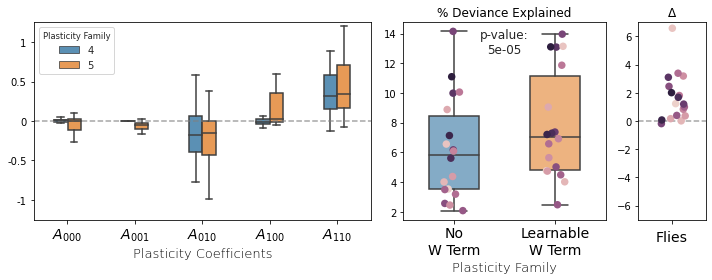

In [10]:
def make_translucent(boxplot, alpha, style="ticks"):
    for patch in box_plot.patches:
        sns.set_style(style)
        r, g, b, a = patch.get_facecolor()
        patch.set_facecolor((r, g, b, alpha))

def format_func(value, tick_number):
    return f'{value:g}'



style = "ticks"
alpha = 0.6

fig, axs = plt.subplots(nrows=1, ncols=3,  figsize=(10, 4), width_ratios=[5,3,1])

labels = ["$A_{000}$", '$A_{001}$', '$A_{010}$', '$A_{100}$', '$A_{110}$']
box_plot = sns.boxplot(data=melted_df, x="coeff_name", y="coeff_val", hue="trainable_coeffs", ax=axs[0], width=0.4)
make_translucent(box_plot, alpha+0.2)
axs[0].legend(title='Plasticity Family', loc='upper left', title_fontsize='small')
axs[0].set_xlabel("Plasticity Coefficients", fontsize=13, fontweight="light")
axs[0].set_ylabel(None)
axs[0].axhline(y=0, color='gray', linestyle='--', alpha=0.7)
axs[0].set_ylim(-1.25, 1.25)
axs[0].set_xticklabels(labels, fontsize=14)
axs[0].yaxis.set_major_formatter(ticker.FuncFormatter(format_func))

labels = ["No\nW Term", "Learnable\nW Term"]
axs[1].set_title('% Deviance Explained')

sns.stripplot(data=df_subset, x="trainable_coeffs", y="percent_deviance", hue="flyid", size=7.5, ax=axs[1])
box_plot = sns.boxplot(data=df_subset, x="trainable_coeffs", y="percent_deviance", width=0.5,ax=axs[1])
make_translucent(box_plot, alpha)
axs[1].set_xticklabels(labels, fontsize=14)
axs[1].text(0.5, 0.9, f"p-value:\n{round(p_value, 5)}", horizontalalignment='center', verticalalignment='center', transform=axs[1].transAxes, fontsize=12)
axs[1].set_xlabel("Plasticity Family", fontsize=13, fontweight="light")
axs[1].set_ylabel(None)
axs[1].legend().remove()
axs[1].yaxis.set_major_formatter(ticker.FuncFormatter(format_func))

axs[2].set_title('$\Delta$ ', fontsize='large')
sns.stripplot(data=df2, y="delta_dev", hue="flyid", size=7.5, ax=axs[2], jitter=0.2)
axs[2].set_xlabel('Flies', fontsize=14)
axs[2].axhline(y=0, color='gray', linestyle='--', alpha=0.7)
axs[2].set_ylim(-7, 7)
axs[2].legend().remove()
axs[2].set_ylabel(None)
plt.tight_layout()

plt.savefig("fig5a-w-vs-now.svg", dpi=500)

In [11]:
# Get all the csv files in the current directory
csv_files = glob.glob("../../experiments/logs/expdata/avg-window-tuning/exp_*.csv")

# Create a list of dataframes
dfs = []

# Iterate over the csv files
for csv_file in csv_files:

    # Read the csv file into a dataframe
    df = pd.read_csv(csv_file)

    # Append the dataframe to the list of dataframes
    dfs.append(df)

# Concatenate the dataframes into a single dataframe
df = pd.concat(dfs)

In [12]:
coeffs, other_columns = [], []

for i in range(3):
        for j in range(3):
            for k in range(3):
                coeffs.append(f"A_{i}{j}{k}")

for column in df.columns:
    if column not in set(coeffs):
        other_columns.append(column)
print(other_columns)

for coeff in coeffs:
    df[coeff] = pd.to_numeric(df[coeff])
df["moving_avg_window"] = df["moving_avg_window"].astype(int)
df["flyid"].unique()

['epoch', 'loss', 'train_time', 'percent_deviance', 'num_train', 'num_eval', 'num_epochs', 'log_interval', 'num_blocks', 'log_expdata', 'use_experimental_data', 'flyid', 'fit_data', 'jobid', 'input_firing_mean', 'input_variance', 'l1_regularization', 'generation_coeff_init', 'generation_model', 'plasticity_coeff_init', 'plasticity_model', 'moving_avg_window', 'data_dir', 'log_dir', 'trainable_coeffs', 'exp_name', 'info', 'layer_sizes']


array([ 1, 10, 11, 12, 13, 14, 15, 16, 17, 18,  2,  3,  4,  5,  6,  7,  8,
        9])

In [13]:
df_subset = df.loc[ (df['layer_sizes'] == "[2, 1]")  & (df['l1_regularization'] == 0.0) & (df['epoch'] == 250) & (df['info'] == "using expected reward")]
for coeff in coeffs:
    if df_subset[coeff].sum() == 0:
        df_subset = df_subset.drop(coeff, axis=1)

df_subset.head()

,A_000,A_001,A_010,A_100,A_110,epoch,loss,train_time,percent_deviance,num_train,...,generation_model,plasticity_coeff_init,plasticity_model,moving_avg_window,data_dir,log_dir,trainable_coeffs,exp_name,info,layer_sizes
120,0.137278,-0.097627,0.403300,-0.205244,0.501192,250,0.688700,75.972,5.395673,20,...,volterra,random,volterra,7,../data/,logs/,5,avg-window-tuning,using expected reward,"[2, 1]"
131,0.147242,-0.104027,0.517187,-0.219337,0.534939,250,0.688496,75.772,5.663239,20,...,volterra,random,volterra,6,../data/,logs/,5,avg-window-tuning,using expected reward,"[2, 1]"
164,0.135187,-0.096310,0.325354,-0.203135,0.497310,250,0.688793,77.059,5.270036,20,...,volterra,random,volterra,8,../data/,logs/,5,avg-window-tuning,using expected reward,"[2, 1]"
175,0.169837,-0.126196,0.893783,-0.236382,0.600514,250,0.688026,77.466,6.219754,20,...,volterra,random,volterra,4,../data/,logs/,5,avg-window-tuning,using expected reward,"[2, 1]"
186,0.160504,-0.117567,0.661167,-0.230696,0.576522,250,0.688337,77.704,5.828074,20,...,volterra,random,volterra,5,../data/,logs/,5,avg-window-tuning,using expected reward,"[2, 1]"


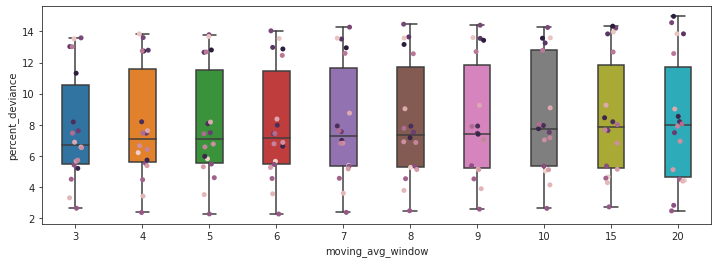

In [14]:
fig, ax = plt.subplots(figsize=(12, 4))
sns.boxplot(data=df_subset, x="moving_avg_window", y="percent_deviance", width=0.4)
sns.stripplot(data=df_subset, x="moving_avg_window", y="percent_deviance", hue="flyid")
ax.legend().remove()

In [15]:
df_subset = df.loc[ (df['layer_sizes'] == "[2, 1]")  & (df['l1_regularization'] == 0.001) & (df['epoch'] == 250) & (((df['info'] == "using reward") & (df['moving_avg_window'] == 3)) | ((df['info'] == "using expected reward") & (df['moving_avg_window'] == 15)))]
for coeff in coeffs:
    if df_subset[coeff].sum() == 0:
        df_subset = df_subset.drop(coeff, axis=1)

In [16]:
df_temp = df_subset.loc[(df_subset['info'] == "using reward")]
df1 = df_temp.sort_values('flyid')[["flyid", "percent_deviance"]]
# print("With E(R)\n", df1)

df_temp = df_subset.loc[(df_subset['info'] == "using expected reward")]
df2 = df_temp.sort_values('flyid')[["flyid", "percent_deviance"]]
# print("With R\n", df2)

df2["delta_dev"] = df2["percent_deviance"].values - df1["percent_deviance"].values
result = stats.wilcoxon(df1["percent_deviance"].values, df2["percent_deviance"].values)

print('Statistic:', result.statistic)
print('p-value:', result.pvalue)
p_value = round(result.pvalue,5)

Statistic: 43.0
p-value: 0.06653594970703125


In [17]:
melted_df = pd.melt(df_subset, id_vars=other_columns, var_name="coeff_name", value_name="coeff_val").astype({'coeff_val': 'float'})

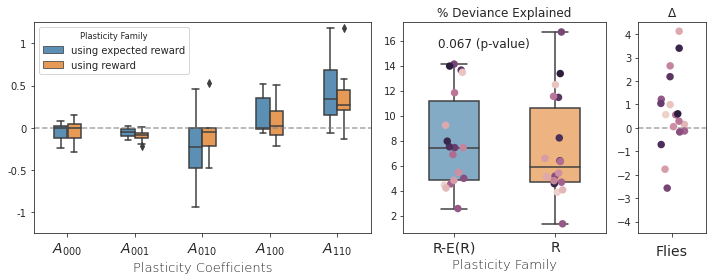

In [18]:
def make_translucent(boxplot, alpha, style=style):
    for patch in box_plot.patches:
        sns.set_style(style)
        r, g, b, a = patch.get_facecolor()
        patch.set_facecolor((r, g, b, alpha))

def format_func(value, tick_number):
    return f'{value:g}'



style = "ticks"
alpha = 0.6

fig, axs = plt.subplots(nrows=1, ncols=3,  figsize=(10, 4), width_ratios=[5,3,1])

labels = ["$A_{000}$", '$A_{001}$', '$A_{010}$', '$A_{100}$', '$A_{110}$']
box_plot = sns.boxplot(data=melted_df, x="coeff_name", y="coeff_val", hue="info", ax=axs[0], width=0.4)
make_translucent(box_plot, alpha+0.2)
axs[0].legend(title='Plasticity Family', loc='upper left', title_fontsize='small')
axs[0].set_xlabel("Plasticity Coefficients", fontsize=13, fontweight="light")
axs[0].set_ylabel(None)
axs[0].axhline(y=0, color='gray', linestyle='--', alpha=0.7)
axs[0].set_ylim(-1.25, 1.25)
axs[0].set_xticklabels(labels, fontsize=14)
axs[0].yaxis.set_major_formatter(ticker.FuncFormatter(format_func))

labels = ["R-E(R)", "R"]
axs[1].set_title('% Deviance Explained')

sns.stripplot(x="info", y="percent_deviance", hue="flyid", data=df_subset, size=7.5, ax=axs[1])
box_plot = sns.boxplot(data=df_subset, x="info", y="percent_deviance", width=0.5,ax=axs[1])
make_translucent(box_plot, alpha)
axs[1].set_xticklabels(labels, fontsize=14)
axs[1].text(0.4, 0.9, f'{round(p_value, 3)} (p-value)', horizontalalignment='center', verticalalignment='center', transform=axs[1].transAxes, fontsize=12)
axs[1].set_xlabel("Plasticity Family", fontsize=13, fontweight="light")
axs[1].set_ylabel(None)
axs[1].legend().remove()
axs[1].yaxis.set_major_formatter(ticker.FuncFormatter(format_func))

axs[2].set_title('$\Delta$ ', fontsize='large')
sns.stripplot(data=df2, y="delta_dev", hue="flyid", size=7.5, ax=axs[2], jitter=0.2)
axs[2].set_xlabel('Flies', fontsize=14)
axs[2].axhline(y=0, color='gray', linestyle='--', alpha=0.7)
axs[2].set_ylim(-4.5, 4.5)
axs[2].legend().remove()
axs[2].set_ylabel(None)

plt.tight_layout()
plt.savefig("fig5b-r-vs-er.svg", dpi=500)